# Final Exam: Practical Assessment

These are test questions in which students are given a duration of 1 hour to answer from the time the question is given. Lab Assessment based on Superstore dataset. The dataset will be provided to the students. Provide the code and the output in Jupyter Notebook.

Name:


Student ID:

1) Create a data frame that contains all the data from Superstore.xlsx.          (1 mark)

In [1]:
import pandas as pd
df = pd.read_excel('Superstore.xlsx')
print(type(df))
df.head(3)

<class 'pandas.core.frame.DataFrame'>


,Country,Postal Code,Product ID,Category,Sales,Shipping Cost,Order Priority
0,0,1,10024,1,Technology,2309.650,High
1,8,1,95823,9,Office Supplies,5083.960,High
2,9,1,28027,10,Furniture,4297.644,Critical


In [ ]:
# df = df.drop(['Order ID','Order Date','Row ID','Ship Date','Customer Name','Customer ID','Product ID','Postal Code','Sub-Category','Product Name'],axis=1)
# df = df.drop(['Unnamed: 21','Unnamed: 22','Unnamed: 23'],axis=1)

2) Show only the following columns from the data frame that you have created in question(1):- Country, category and product id. (1 mark)                                            

In [ ]:
df1 = df[['Country', 'Product ID','Category']]

In [ ]:
#### Question 2
#Count the number of customers who made payment via credit card, cheque and cash. (2 marks)

In [ ]:
# Method 2
#df['Payment Method'].value_counts()

3) Count the number of product ID with high order priority.                     (2 marks)

In [10]:
len(df.loc[df['Order Priority'] == 'High'])

2

In [12]:
# Method 2
len(df[df['Order Priority'] == 'High'])

2

In [16]:
# Method 3
df['Order Priority'][df['Order Priority']=='High'].value_counts()

High    2
Name: Order Priority, dtype: int64

Question 3
Plot a graph with different payment methods. Y-axis should represent the different types of payment methods, X-axis as Number of Customers. The title of the graph should be "Payment Methods" (2 marks)

In [ ]:
# import matplotlib.pyplot as plt

# df['Payment Method'].value_counts().plot.bar()
# plt.xlabel('Different types of payment methods')
# plt.ylabel('Number of Customers')
# plt.title('Payment Methods')
# plt.show()

4) Plot a graph with different order priority. X-axis should represent the different types of order priority, y-axis as Number of Products. The title of the graph should be "Order Priority by Products".                                                           (2 marks)

[Text(0.5, 1.0, 'Order Priority by Products')]

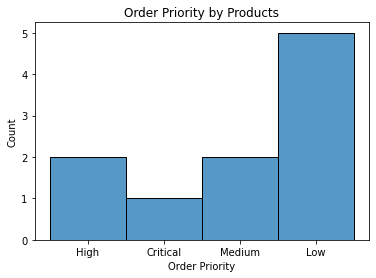

In [17]:
import seaborn as sns;
sns.histplot(data=df,x=df["Order Priority"]).set(title='Order Priority by Products')

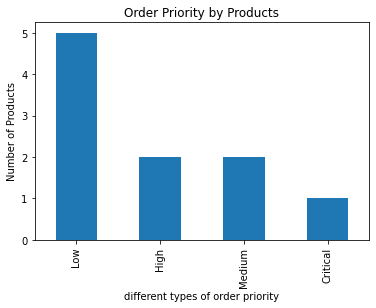

In [18]:
# Method 2
import matplotlib.pyplot as plt

df['Order Priority'].value_counts().plot.bar()
plt.xlabel('different types of order priority')
plt.ylabel('Number of Products')
plt.title('Order Priority by Products')
plt.show()

5. Normalize Shipping Cost to a range of 0 to 1. (2 marks)

In [30]:
import numpy as np
sc = df['Shipping Cost']
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_x = NormalizeData(sc)

print(scaled_x)

,Country,Postal Code,Product ID,Category,Sales,Shipping Cost,Order Priority
0,0,1,10024,1,0,0.253052,0
1,8,1,95823,9,1,1.000000,0
2,9,1,28027,10,2,0.788294,1
3,10,1,22304,11,1,0.752326,2
4,16,1,42420,17,0,0.236968,2
5,439,3,36608,440,0,0.449690,3
6,444,1,22153,445,0,0.573520,3
7,481,1,18018,482,1,0.000000,3
8,490,1,98226,491,2,0.348893,3
9,496,4,10035,497,0,0.090228,3


In [31]:
# Method 2
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x=np.array(df["Shipping Cost"]).reshape(-1,1)
min_max_scaler=preprocessing.MinMaxScaler()
x_minmax=min_max_scaler.fit_transform(x)
#print(x_minmax)
df["Shipping Cost"]=x_minmax.reshape(-1,1)
df

,Country,Postal Code,Product ID,Category,Sales,Shipping Cost,Order Priority
0,0,1,10024,1,0,0.253052,0
1,8,1,95823,9,1,1.000000,0
2,9,1,28027,10,2,0.788294,1
3,10,1,22304,11,1,0.752326,2
4,16,1,42420,17,0,0.236968,2
5,439,3,36608,440,0,0.449690,3
6,444,1,22153,445,0,0.573520,3
7,481,1,18018,482,1,0.000000,3
8,490,1,98226,491,2,0.348893,3
9,496,4,10035,497,0,0.090228,3


5) Drop rows with 1 or more missing values.                                 (2 marks)

In [19]:
missing_values=df.isnull().sum()
print(missing_values)

missing = df[df['Postal Code'].isnull()].index
df = df.drop(missing)
df.isnull().sum()

Country           0
Postal Code       0
Product ID        0
Category          0
Sales             0
Shipping Cost     0
Order Priority    0
dtype: int64


Country           0
Postal Code       0
Product ID        0
Category          0
Sales             0
Shipping Cost     0
Order Priority    0
dtype: int64

In [ ]:
# Method 2
df = df.dropna()
df

6) Replace the following values of Order Priority. Low and Medium values to "no", High and Critical values to "yes". (Low->no, Medium->no, High->yes, Critical->yes).                                                                                                          (2 marks)

In [ ]:
# Question 6¶
# Replace the following values of Payment method (2 marks)

# 0-credit card
# 1-cheque
# 2-cash
# df.replace('credit card','0',inplace=True)
# df.replace('cheque','1',inplace=True)
# df.replace('cash','2',inplace=True)
# df

In [ ]:
df['Order Priority'] = df['Order Priority'].replace(['Low','Medium','High','Critical'],['No','No','Yes','Yes'])
df

In [ ]:
#Method 2
df['Order Priority'] = df['Order Priority'].replace(['Low','Medium'],'no')
df['Order Priority'] = df['Order Priority'].replace(['High','Critical'],'yes')
df

7) Write the cleaned data into "Cleaned.csv".                                                  (1 mark)

In [ ]:
df.to_csv('Cleaned.csv',index = False)
#df.to_csv('Cleaned.csv')

8) Read the data from "Cleaned.csv" into a data frame.                                  (1 mark)


In [ ]:
import pandas as pd
df2 = pd.read_csv('Cleaned.csv')
df2

9) You are required to predict the order priority (yes or no). Train the data that you have cleaned until question (8) by using GaussianNB model. The training size is 80% and testing is 20%. Use split validation.                                             (6 marks)

In [24]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
df[cat_features] = df[cat_features].apply(lambda x: pd.factorize(x)[0])

In [25]:
#X = df.drop(['Order Priority','Category'], axis=1)
X = df.drop(['Order Priority'], axis=1)

y = df["Order Priority"]
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (10, 6) 
 y_shape: (10,)


In [26]:
from sklearn.model_selection import train_test_split
#Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, Y_df,random_state=123, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=0)

In [ ]:
# from sklearn.naive_bayes import GaussianNB # 1. choose model class
# model = GaussianNB()                       # 2. instantiate model
# model.fit(Xtrain, ytrain)                  # 3. fit model to data
# y_model = model.predict(Xtest)             # 4. predict on new data
# y_model

In [28]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)
pred = model_gnb.predict(X_test)
pred

array([2, 3], dtype=int64)

10) What is the accuracy score of your test data?			            (2 marks)

In [29]:
from sklearn.metrics import accuracy_score
#accuracy_score(ytest, y_model)
gnb = accuracy_score(y_test,pred)*100
acc = [gnb]
labels = ['GaussianNB']
accs = {'Accuracy': acc}
df3 = pd.DataFrame(accs,index=labels)
df3

,Accuracy
GaussianNB,50.0
